# Лабораторная работа 2 (Задание №1):
Рассмотреть логистическую регрессию с двумя параметрами. Построить поверхность со следующими осями: w1, w2, sigma (оптимальный параметр априорного распределения для модели с параметрами [w1, w2]). Цветом поверхности задать значение апостериорной вероятности в точки поверхности. Модель: логистическая регрессия. Выборка: произвольная (допускается использование синтетических выборок или использование двух наиболее значимых параметров на одном из стандартных датасетов sklearn). Априорное распределение параметров: нормальное распределение со скалярным параметром дисперсии дисперсией (N(0, sigma^2 * I)). Оптимальное значение sigma выбрать перебором.

## Исполнитель:
Бишук Антон

### Теоретические выкладки

1. Будем считать, что решаем задачу вместе с l2 регуляризацией с коэффициентом 1, тогда оптимальное значение $\sigma$ можно найти из равенства $\sigma = \left(\frac{1}{C}\right)^{\frac{1}{2}}$

2. Найдем апостериорную вероятность:

$$\log(p(w|Y)) = -\frac{1}{2}(w-w_0)^TS^{-1}(w-w_0) + \sum_i(y_i\log t_i + (1-y_i)log(1-t_i))$$

In [22]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [3]:
X, y = load_iris(return_X_y=True, as_frame=True)

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

X = X[['petal length (cm)', 'petal width (cm)']]

In [17]:
arr_C = np.linspace(0.1, 5, 10)

In [29]:
model = LogisticRegression(penalty='l2') # lambda = 1
model.fit(X, y)

def get_optimal_sigma(w):
    model.coef_ = np.array([w])
    best_predict = accuracy_score(y, model.predict(X))
    best_c = model.C
    for c in arr_C:
        model.C = c
        if accuracy_score(y, model.predict(X)) > best_predict:
            best_predict = accuracy_score(y, model.predict(X))
            best_c = c
    return (1 / best_c) ** 0.5

def get_p_w_y(w, model, Y, X):
    model.coef_ = np.array([w])
    s2 = sum([y * np.log(t) + (1 - y) * np.log(1 - t) for y, t in zip(Y, model.predict_proba(X)[:,1])])
    sigma = get_optimal_sigma(w)
    return np.exp(-1/2 * (model.coef_ @ (np.eye(2) * sigma**2) @ model.coef_.T)[0][0] + s2)

In [30]:
N = 100
Z_plot = np.zeros((N, N))
COLOR = np.zeros((N, N))
for i, w1 in enumerate(tqdm(np.linspace(0.1, 1, N))):
    for j, w2 in enumerate(np.linspace(0.1, 1, N)):
        Z_plot[i,j] = get_optimal_sigma([w1, w2])
        COLOR[i,j] = get_p_w_y([w1, w2], model, y, X)

  0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
COLOR = np.log(np.array(COLOR))

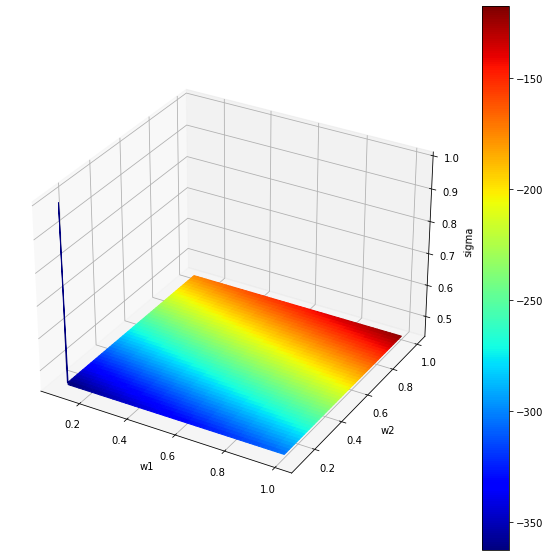

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X_plot = np.linspace(0.1, 1, N)
Y_plot = np.linspace(0.1, 1, N)
X_plot, Y_plot = np.meshgrid(X_plot, Y_plot)

norm = matplotlib.colors.Normalize(vmin=COLOR.min().min(), vmax=COLOR.max().max())

surf = ax.plot_surface(X_plot, Y_plot, Z_plot, facecolors=plt.cm.jet(norm(COLOR)), shade=False)

ax.set_zlabel('sigma')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
m.set_array([])
plt.colorbar(m)


### Вывод:

Почему то оптимальным параметром было одно и тоже число почти для любых значений весов. Возможно, что нужно будет провести более подробный анализ.